# Análisis y Predicción del Mercado Inmobiliario en España para la Optimización de la venta y compra

## por Germán Bosch Estévez

En este notebook, se presenta el código utilizado para desarrollar el proyecto.


## Otencion de datos

Los datos son obtenidos de la pagina del ministerio de transportes y movilidad sostenible:

https://apps.fomento.gob.es/BoletinOnline2/?nivel=2&orden=35000000

https://apps.fomento.gob.es/BoletinOnline2/?nivel=2&orden=36000000

## Obtención y procesado de datos

In [ ]:
cd C:\Users\GermanBo\Desktop\Kschool\Proyecto_inmobiliario\datos

C:\Users\GermanBo\Desktop\Kschool\Proyecto_inmobiliario\datos


In [ ]:
# Con esta funcion vamos a eliminar las provincias del analisis, ya que hace confuso en analisis
def comunidades(df):
    comunidades_autonomas = ['Andalucía', 'Aragón', 'Asturias (Principado de )', 'Balears (Illes)',
                         'Canarias', 'Cantabria', 'Castilla y León', 'Castilla-La Mancha',
                         'Cataluña', 'Comunidad Valenciana', 'Extremadura', 'Galicia',
                         'Madrid (Comunidad de)', 'Murcia (Región de)', 'Navarra (Comunidad Foral de)',
                         'País Vasco', 'Rioja (La)', 'Ceuta', 'Melilla']
    # Filtrar el DataFrame por las comunidades autónomas
    df_c = df[df['Region'].isin(comunidades_autonomas)]
    df_c = pd.DataFrame(df_c)
    return(df_c)

In [ ]:
import pandas as pd


# Función para procesar el DataFrame
def procesar_dataframe(df):
    df_1 = df.iloc[10:, :].reset_index(drop=True)
    x = df_1.iloc[0, :].astype(str).to_list()
    y = "_"
    for i in range(len(x)):
        if x[i].startswith("Año"):
            y = x[i]
        else:
            x[i] = y
    df_1.columns = x
    encabezado = df_1.columns + '_' + (df_1.iloc[2].to_list())
    df_1.columns = encabezado
    df_2 = df_1.iloc[3:, 1:]
    df_2 = df_2.rename(columns={'__nan': 'Region'})

    melted_df = df_2.melt(id_vars=df_2.columns[0], value_vars=df_2.columns[1:], var_name='Año_Trimestre', value_name='Valor')
    melted_df[['Año', 'Trimestre']] = melted_df['Año_Trimestre'].str.split('_', expand=True)
    melted_df['Año'] = melted_df['Año'].str.replace('Año ', '').astype(int)
    melted_df['Valor'] = pd.to_numeric(melted_df['Valor'], errors='coerce')
    final = melted_df[['Region','Año', 'Trimestre', 'Valor']]
    final.loc[:, 'Trimestre']= final['Trimestre'].str.strip()
    final = comunidades(final)
    final= final.dropna()
    return final

# Leer todas las hojas del archivo Excel en una lista de DataFrames
archivo_excel = 'valor_tasado_vivienda_libre.XLS'
hojas_excel = pd.read_excel(archivo_excel, sheet_name=None)

# Procesar cada DataFrame en la lista de hojas del Excel
resultados = []
for nombre_hoja, df_hoja in hojas_excel.items():
    resultados.append(procesar_dataframe(df_hoja))

# Concatenar todos los DataFrames tratados en un único DataFrame final
tasacion_media = pd.concat(resultados, ignore_index=True)


In [ ]:
import pandas as pd

def procesar_archivo_excel(archivo_excel):
    # Leer el archivo Excel
    df = pd.read_excel(archivo_excel)

    # Seleccionar las filas y columnas de interés
    df_1 = df.iloc[9:74, 1:82].reset_index(drop=True)

    # Modificar los nombres de las columnas
    x = df_1.iloc[0, :].astype(str).to_list()
    y = "_"
    for i in range(len(x)):
        if x[i].startswith("Año"):
            y = x[i]
        else:
            x[i] = y
    df_1.columns = x
    encabezado = df_1.columns + '_' + (df_1.iloc[2].to_list())
    df_1.columns = encabezado

    # Seleccionar las filas y columnas de interés
    df_2 = df_1.iloc[3:, 0:]
    df_2 = df_2.rename(columns={'__nan': 'Region'})
    df_2 = df_2.dropna()

    # Derretir el DataFrame
    melted_df = df_2.melt(id_vars=df_2.columns[0], value_vars=df_2.columns[1:], var_name='Año_Trimestre', value_name='Valor')
    melted_df[['Año', 'Trimestre']] = melted_df['Año_Trimestre'].str.split('_', expand=True)
    melted_df['Año'] = melted_df['Año'].str.replace('Año ', '').astype(int)
    melted_df['Valor'] = pd.to_numeric(melted_df['Valor'], errors='coerce')
    final = melted_df[['Region', 'Año', 'Trimestre', 'Valor']]
    final.loc[:, 'Trimestre']= final['Trimestre'].str.strip()
    final = comunidades(final)
    final= final.dropna()


    return final


num_tran = procesar_archivo_excel("Numero total de transacciones de suelo.XLS")
pre_m2 = procesar_archivo_excel("Precio medio del metro cuadrado de suelo urbano.XLS")
sup_tran = procesar_archivo_excel("Superficie de las transacciones de suelo. Total.XLS")


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def graficar_y_estadisticas(df, columna):
    """
    Esta función toma un DataFrame y una columna específica, genera un histograma con una línea de densidad,
    y calcula estadísticas descriptivas como cuartiles, media, mediana y desviación típica.

    Parámetros:
    df (pd.DataFrame): DataFrame que contiene los datos.
    columna (str): Nombre de la columna en el DataFrame que se quiere analizar.

    Devuelve:
    pd.DataFrame: Un DataFrame con las estadísticas descriptivas.
    """
    # Verifica si la columna existe en el DataFrame
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no está en el DataFrame.")

    # Datos de la columna
    datos = df[columna]

    # Creación del histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(datos, bins=10, kde=True)
    plt.title(f"Histograma de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.show()

    # Cálculo de estadísticas descriptivas
    estadisticas = {
        'Media': datos.mean(),
        'Mediana': datos.median(),
        'Desviación Típica': datos.std(),
        'Cuartil 25%': datos.quantile(0.25),
        'Cuartil 50% (Mediana)': datos.quantile(0.50),
        'Cuartil 75%': datos.quantile(0.75),
        'Rango Intercuartílico': datos.quantile(0.75) - datos.quantile(0.25)
    }

    # Creación de un DataFrame con las estadísticas
    df_estadisticas = pd.DataFrame(list(estadisticas.items()), columns=['Estadística', 'Valor'])

    return df_estadisticas

## Descripción de los datos

Los datos que usaremos para nuestro analisis serán lo siguientes:

In [ ]:
# Valor tasado medio de vivienda libre. Unidad: euros / m2
tasacion_media.head()

,Region,Año,Trimestre,Valor
0,Andalucía,1995,1º,513.4
1,Aragón,1995,1º,573.6
2,Asturias (Principado de ),1995,1º,657.9
3,Balears (Illes),1995,1º,586.0
4,Canarias,1995,1º,572.4


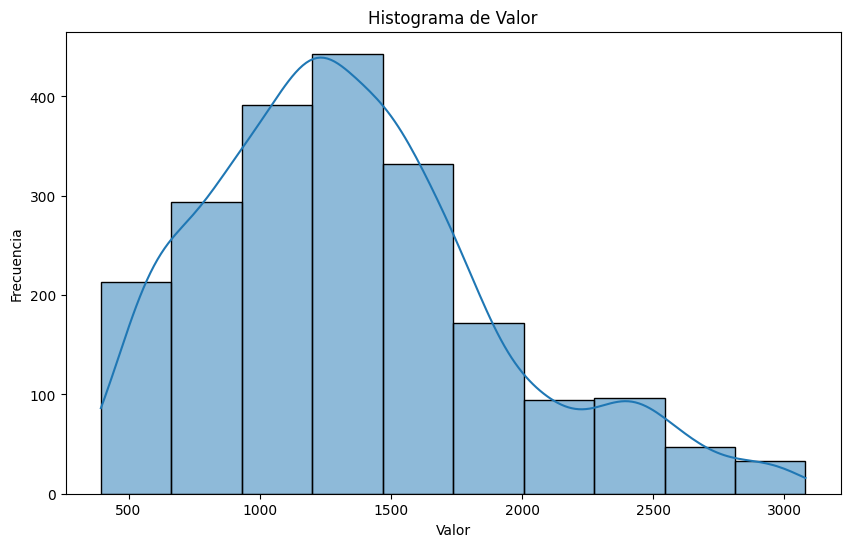

In [ ]:
estadisticas = graficar_y_estadisticas(tasacion_media, "Valor")

In [ ]:
estadisticas

,Estadística,Valor
0,Media,1354.043924
1,Mediana,1285.300000
2,Desviación Típica,553.983292
3,Cuartil 25%,953.200000
4,Cuartil 50% (Mediana),1285.300000
5,Cuartil 75%,1654.950000
6,Rango Intercuartílico,701.750000


In [ ]:
# Precio medio del metro cuadrado de suelo urbano por comunidades autónomas y provincias. Unidad: euros/m2
pre_m2.head()

,Region,Año,Trimestre,precio_m2
1,Andalucía,2004,1º,174.75
10,Aragón,2004,1º,195.63
13,Asturias (Principado de ),2004,1º,277.16
14,Balears (Illes),2004,1º,243.39
15,Canarias,2004,1º,260.88


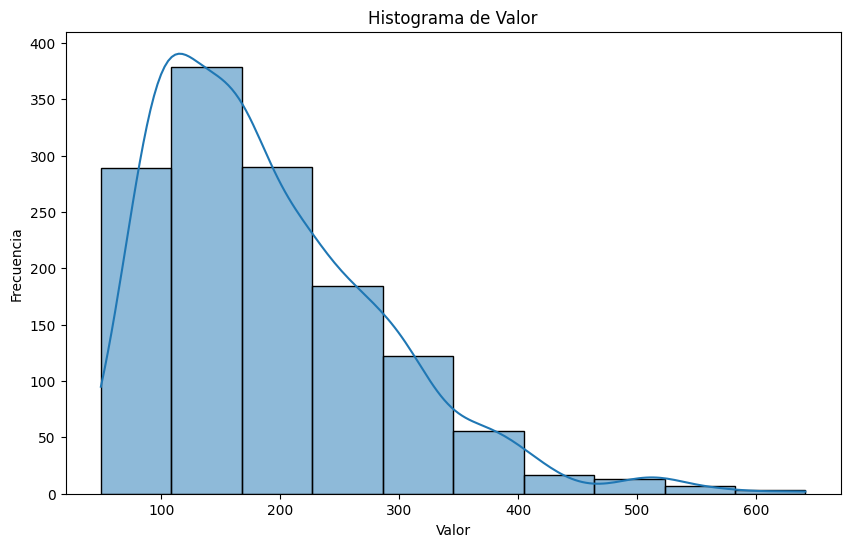

In [ ]:
estadisticas = graficar_y_estadisticas(pre_m2, "Valor")

In [ ]:
estadisticas

,Estadística,Valor
0,Media,190.335066
1,Mediana,170.550000
2,Desviación Típica,96.284706
3,Cuartil 25%,114.517500
4,Cuartil 50% (Mediana),170.550000
5,Cuartil 75%,244.475000
6,Rango Intercuartílico,129.957500


In [ ]:
# Superficie de las transacciones de suelo. Total
sup_tran.head()

,Region,Año,Trimestre,Valor
1,Andalucía,2004,1º,5128.1
10,Aragón,2004,1º,525.9
14,Asturias (Principado de ),2004,1º,178.2
15,Balears (Illes),2004,1º,728.3
16,Canarias,2004,1º,1020.9


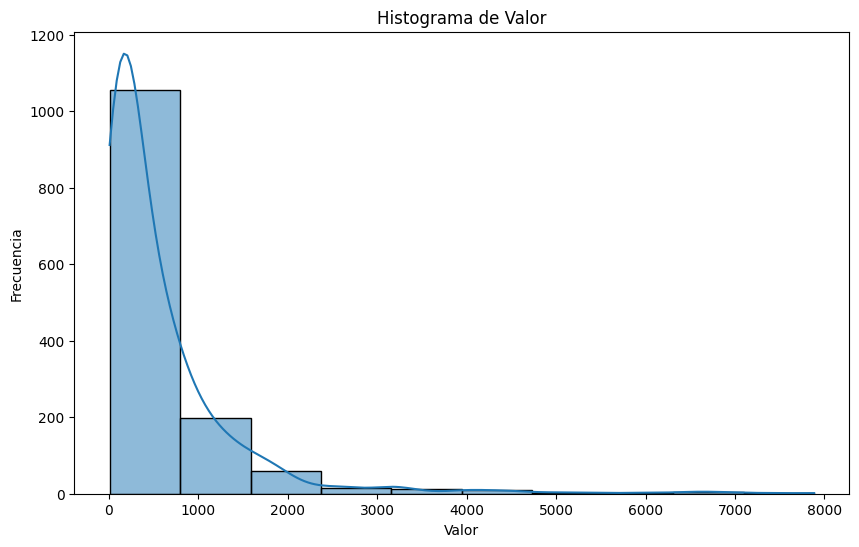

In [ ]:
estadisticas = graficar_y_estadisticas(sup_tran, "Valor")

In [ ]:
estadisticas

,Estadística,Valor
0,Media,592.843451
1,Mediana,288.580000
2,Desviación Típica,867.768972
3,Cuartil 25%,116.370000
4,Cuartil 50% (Mediana),288.580000
5,Cuartil 75%,713.621733
6,Rango Intercuartílico,597.251733


In [ ]:
# Numero total de transacciones de suelo
num_tran.head()

,Region,Año,Trimestre,Valor
1,Andalucía,2004,1º,3538
10,Aragón,2004,1º,432
14,Asturias (Principado de ),2004,1º,143
15,Balears (Illes),2004,1º,677
16,Canarias,2004,1º,650


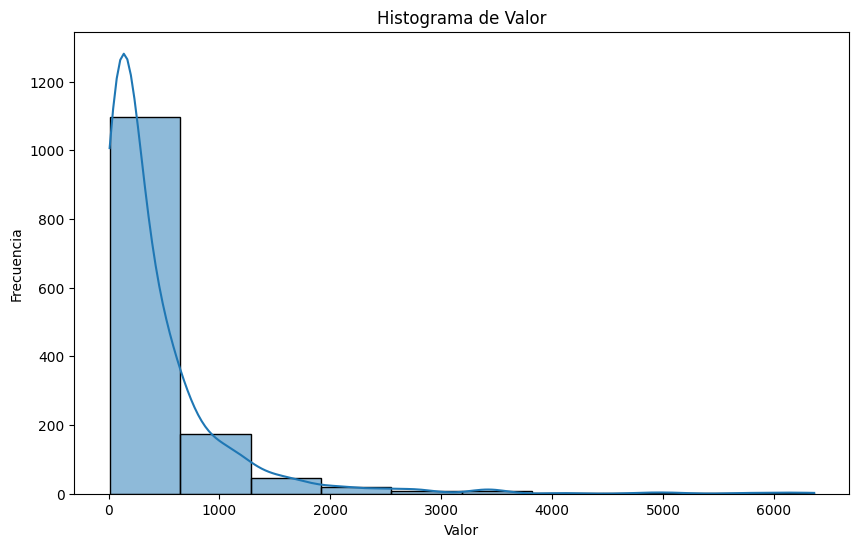

In [ ]:
estadisticas = graficar_y_estadisticas(num_tran, "Valor")

In [ ]:
estadisticas

,Estadística,Valor
0,Media,436.779412
1,Mediana,204.000000
2,Desviación Típica,647.463562
3,Cuartil 25%,94.000000
4,Cuartil 50% (Mediana),204.000000
5,Cuartil 75%,525.250000
6,Rango Intercuartílico,431.250000


## Analisis de los datos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Tasación media

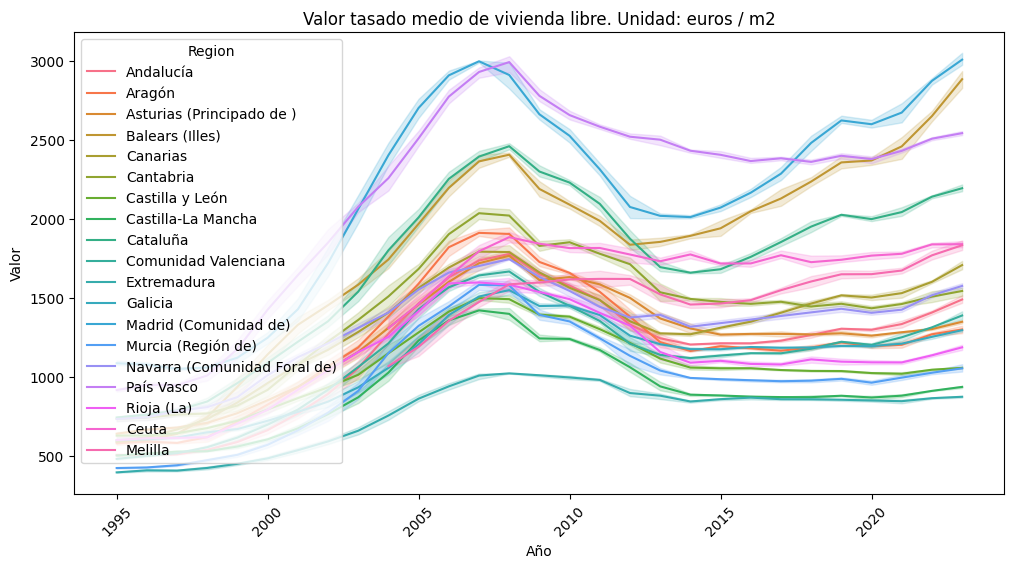

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=tasacion_media, x="Año", y="Valor", hue="Region")

plt.title("Valor tasado medio de vivienda libre. Unidad: euros / m2")
plt.xlabel("Año")
plt.ylabel("Valor")
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Estadisticas para el año 2023
tasacion_media[tasacion_media["Año"]==2023].groupby("Region")["Valor"].describe().sort_values(by= "mean", ascending= False)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Madrid (Comunidad de),4.0,3011.250,47.917325,2978.3,2978.525,2993.35,3026.075,3080.0
Balears (Illes),4.0,2887.575,66.986634,2802.8,2853.125,2894.90,2929.350,2957.7
País Vasco,4.0,2545.975,15.402246,2528.7,2537.775,2544.90,2553.100,2565.4
Cataluña,4.0,2197.375,26.145666,2171.6,2182.625,2192.50,2207.250,2232.9
Ceuta,4.0,1843.350,22.365524,1822.8,1824.600,1843.85,1862.600,1862.9
Melilla,4.0,1836.525,39.093595,1797.9,1810.575,1830.75,1856.700,1886.7
Canarias,4.0,1710.950,32.831337,1670.3,1691.600,1716.05,1735.400,1741.4
Navarra (Comunidad Foral de),4.0,1579.000,19.344939,1560.5,1567.400,1575.10,1586.700,1605.3
Cantabria,4.0,1547.100,30.281457,1504.4,1536.725,1555.85,1566.225,1572.3


In [ ]:
# Año con la tasación maxima
tasacion_media.loc[tasacion_media.groupby('Region')['Valor'].idxmax()].sort_values(by= "Valor", ascending= False)

,Region,Año,Trimestre,Valor
2108,Madrid (Comunidad de),2023,4º,3080.0
931,País Vasco,2008,1º,3035.8
2099,Balears (Illes),2023,4º,2957.7
943,Cataluña,2008,2º,2490.5
883,Cantabria,2007,3º,2089.2
917,Aragón,2008,1º,1962.9
971,Ceuta,2008,3º,1927.3
2095,Melilla,2023,3º,1886.7
939,Canarias,2008,2º,1841.0
935,Andalucía,2008,2º,1805.8


In [ ]:
# Año con la tasación minima a partir del 2007
tasacion_media.loc[tasacion_media[tasacion_media["Año"]>2007].groupby('Region')['Valor'].idxmin()].sort_values(by= "Valor", ascending= False)

,Region,Año,Trimestre,Valor
1713,País Vasco,2018,3º,2339.3
1289,Madrid (Comunidad de),2012,4º,1980.8
1280,Balears (Illes),2012,4º,1800.5
1535,Ceuta,2016,1º,1686.4
1455,Cataluña,2015,1º,1654.6
1427,Melilla,2014,3º,1430.4
1835,Cantabria,2020,2º,1411.9
1423,Navarra (Comunidad Foral de),2014,3º,1301.5
1375,Canarias,2014,1º,1257.9
1870,Asturias (Principado de ),2020,4º,1247.3


### Número total de transacciones

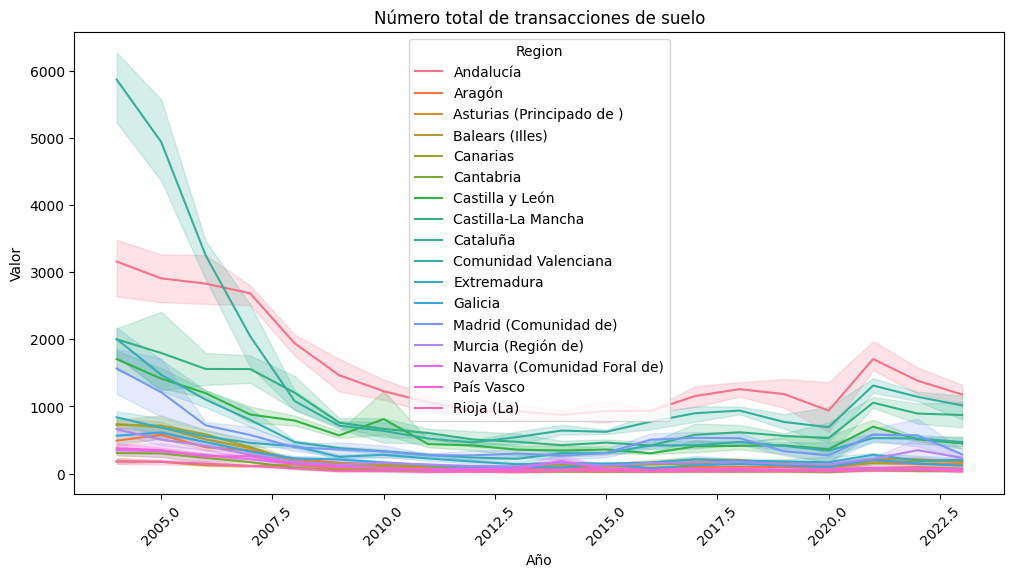

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=num_tran, x="Año", y="Valor", hue="Region")

plt.title("Número total de transacciones de suelo")
plt.xlabel("Año")
plt.ylabel("Valor")
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Numero de transacciones realziadas en 2023
num_tran[num_tran["Año"]==2023].groupby("Region")["Valor"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Andalucía,4.0,1177.75,173.111477,980.0,1084.25,1170.0,1263.50,1391.0
Aragón,4.0,142.75,28.335784,103.0,132.25,151.5,162.00,165.0
Asturias (Principado de ),4.0,75.75,32.714676,44.0,50.75,73.0,98.00,113.0
Balears (Illes),4.0,173.25,32.816408,132.0,155.25,177.5,195.50,206.0
Canarias,4.0,191.00,49.234135,125.0,171.50,199.0,218.50,241.0
Cantabria,4.0,40.25,16.276261,23.0,29.00,39.5,50.75,59.0
Castilla y León,4.0,449.75,104.640257,345.0,399.75,430.0,480.00,594.0
Castilla-La Mancha,4.0,872.50,217.397485,619.0,775.00,862.5,960.00,1146.0
Cataluña,4.0,1015.25,224.003534,687.0,964.50,1107.5,1158.25,1159.0


In [ ]:
# Año donde se ven el mayor numero de transaciones realizadas
num_tran.loc[num_tran.groupby('Region')['Valor'].idxmax()].sort_values(by= "Valor", ascending= False)

,Region,Año,Trimestre,Valor
222,Cataluña,2004,4º,6363
1,Andalucía,2004,1º,3538
340,Castilla-La Mancha,2005,2º,2467
41,Comunidad Valenciana,2004,1º,2213
115,Madrid (Comunidad de),2004,2º,1934
144,Castilla y León,2004,3º,1872
326,Canarias,2005,2º,992
107,Extremadura,2004,2º,939
201,Balears (Illes),2004,4º,862
358,Galicia,2005,2º,750


In [ ]:
# Año donde se ven el menor numero de transaciones realizadas
num_tran.loc[num_tran.groupby('Region')['Valor'].idxmin()].sort_values(by= "Valor", ascending= False)

,Region,Año,Trimestre,Valor
4031,Andalucía,2020,2º,596
1648,Cataluña,2010,3º,383
4060,Castilla-La Mancha,2020,2º,284
4083,Madrid (Comunidad de),2020,2º,148
4050,Castilla y León,2020,2º,147
2273,Comunidad Valenciana,2013,1º,146
4075,Extremadura,2020,2º,100
1914,Murcia (Región de),2011,3º,84
2000,Canarias,2012,1º,69
4045,Balears (Illes),2020,2º,51


### Superficie total de transacciones

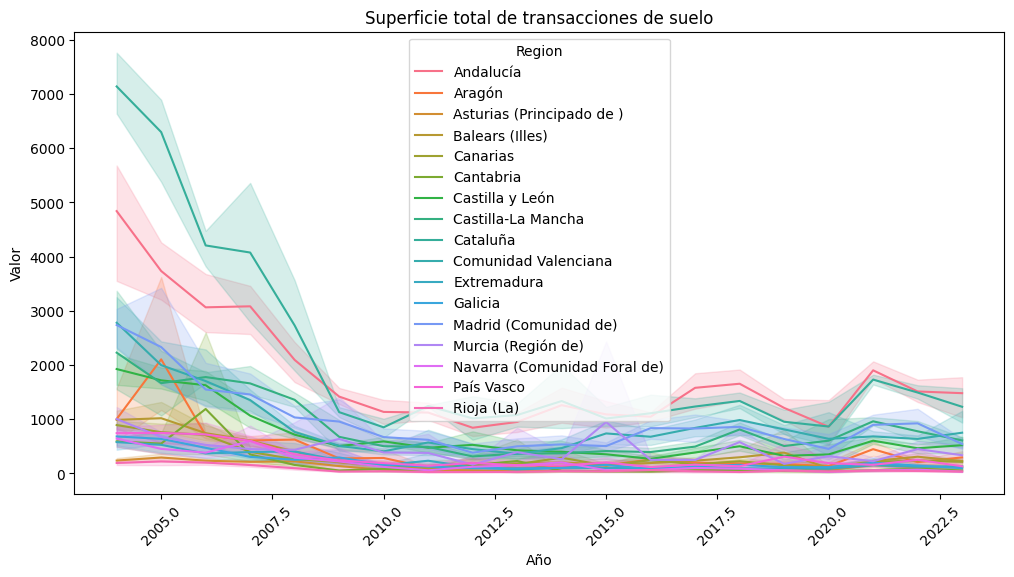

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=sup_tran, x="Año", y="Valor", hue="Region")

plt.title("Superficie total de transacciones de suelo")
plt.xlabel("Año")
plt.ylabel("Valor")
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Numero de transacciones realziadas en 2023
sup_tran[sup_tran["Año"]==2023].groupby("Region")["Valor"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Andalucía,4.0,1480.1475,458.820964,813.20,1378.1600,1631.860,1733.8475,1843.67
Aragón,4.0,295.2750,140.792057,161.28,191.4975,276.175,379.9525,467.47
Asturias (Principado de ),4.0,109.9500,58.091738,45.81,81.2325,104.295,133.0125,185.40
Balears (Illes),4.0,227.4425,27.087731,200.31,212.4450,222.685,237.6825,264.09
Canarias,4.0,212.7125,98.116391,104.49,162.8850,203.360,253.1875,339.64
Cantabria,4.0,53.0125,29.195510,29.68,36.7525,43.505,59.7650,95.36
Castilla y León,4.0,519.7975,195.144654,266.15,416.4875,569.700,673.0100,673.64
Castilla-La Mancha,4.0,608.0525,95.244421,493.38,572.7225,606.320,641.6500,726.19
Cataluña,4.0,1229.1425,370.053799,836.60,1047.1775,1178.365,1360.3300,1723.24


In [ ]:
# Año donde se ven el mayor numero de transaciones realizadas
sup_tran.loc[sup_tran.groupby('Region')['Valor'].idxmax()].sort_values(by= "Valor", ascending= False)

,Region,Año,Trimestre,Valor
222,Cataluña,2004,4º,7884.90000
187,Andalucía,2004,4º,5865.60000
320,Aragón,2005,2º,4430.90000
363,Madrid (Comunidad de),2005,2º,3932.00000
92,Castilla-La Mancha,2004,2º,3904.50000
577,Cantabria,2006,2º,3349.00000
41,Comunidad Valenciana,2004,1º,3298.50000
2906,Murcia (Región de),2015,3º,3188.80000
206,Castilla y León,2004,4º,2268.90000
387,Balears (Illes),2005,3º,1468.50000


In [ ]:
# Año donde se ven el menor numero de transaciones realizadas
sup_tran.loc[sup_tran.groupby('Region')['Valor'].idxmin()].sort_values(by= "Valor", ascending= False)

,Region,Año,Trimestre,Valor
4031,Andalucía,2020,2º,533.71
4066,Cataluña,2020,2º,463.99
2273,Comunidad Valenciana,2013,1º,264.76
2076,Castilla-La Mancha,2012,2º,217.61
4083,Madrid (Comunidad de),2020,2º,203.65
4050,Castilla y León,2020,2º,131.13
2348,Murcia (Región de),2013,2º,79.01
4046,Canarias,2020,2º,62.86
4078,Galicia,2020,2º,55.19
4040,Aragón,2020,2º,51.85


### Precio por metro cuadrado de suelo urbano

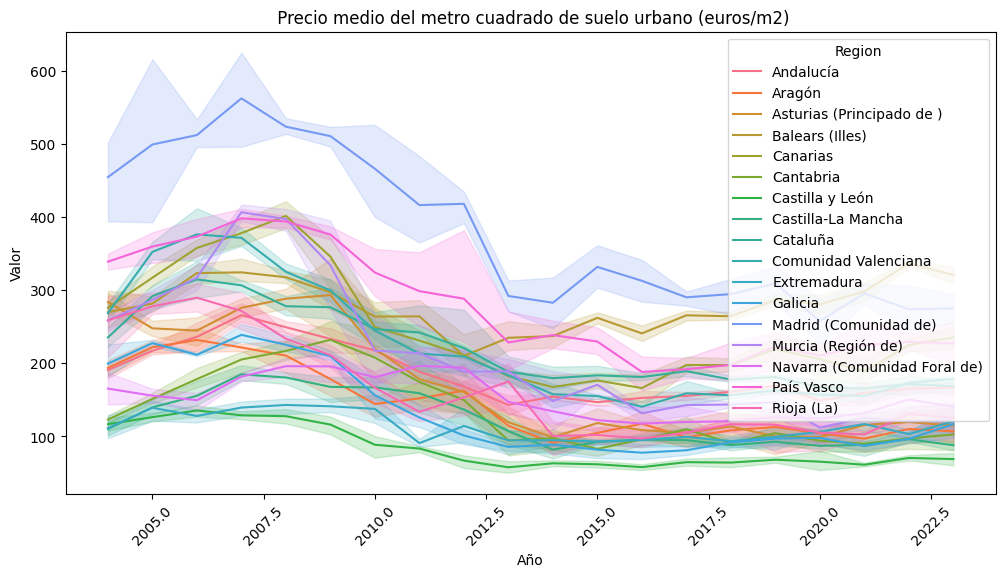

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=pre_m2, x="Año", y="Valor", hue="Region")

plt.title(" Precio medio del metro cuadrado de suelo urbano (euros/m2)")
plt.xlabel("Año")
plt.ylabel("Valor")
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Numero de transacciones realziadas en 2023
pre_m2[pre_m2["Año"]==2023].groupby("Region")["Valor"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Andalucía,4.0,166.8250,10.085043,152.32,164.7400,169.690,171.7750,175.60
Aragón,4.0,107.0900,15.539333,91.02,98.2575,104.865,113.6975,127.61
Asturias (Principado de ),4.0,114.9225,31.269629,74.80,97.9375,121.150,138.1350,142.59
Balears (Illes),4.0,320.9325,14.187634,304.28,311.5625,323.350,332.7200,332.75
Canarias,4.0,235.5225,18.019168,215.24,222.8900,238.025,250.6575,250.80
Cantabria,4.0,102.7100,24.965389,78.33,87.1350,98.310,113.8850,135.89
Castilla y León,4.0,69.1150,10.529934,55.16,63.9125,71.715,76.9175,77.87
Castilla-La Mancha,4.0,88.0625,7.112137,77.69,86.4350,90.585,92.2125,93.39
Cataluña,4.0,168.8100,9.177353,159.58,163.2025,167.390,172.9975,180.88


In [ ]:
# Año donde se ven el mayor precio de transaciones realizadas
pre_m2.loc[pre_m2.groupby('Region')['Valor'].idxmax()].sort_values(by= "Valor", ascending= False)

,Region,Año,Trimestre,Valor
736,Madrid (Comunidad de),2007,2º,641.82
1022,Canarias,2008,4º,429.36
620,Comunidad Valenciana,2006,4º,423.80
737,Murcia (Región de),2007,2º,422.81
1905,País Vasco,2012,4º,416.99
1179,Asturias (Principado de ),2009,3º,362.51
809,Balears (Illes),2007,4º,352.84
615,Cataluña,2006,4º,348.64
529,Rioja (La),2006,2º,317.63
743,Andalucía,2007,3º,289.85


In [ ]:
# Año donde se ven el menor precio de transaciones realizadas
pre_m2.loc[pre_m2.groupby('Region')['Valor'].idxmin()].sort_values(by= "Valor", ascending= False)

,Region,Año,Trimestre,Valor
2220,Madrid (Comunidad de),2014,2º,224.70
1763,Balears (Illes),2012,2º,170.61
3954,Cataluña,2022,3º,153.05
2753,País Vasco,2016,4º,152.75
2068,Andalucía,2013,4º,129.07
2581,Comunidad Valenciana,2016,1º,128.68
2665,Canarias,2016,3º,128.20
2752,Navarra (Comunidad Foral de),2016,4º,94.76
3493,Murcia (Región de),2020,2º,74.85
3614,Aragón,2021,1º,72.59


## Relacion entre variables

In [ ]:
tasacion_media.rename(columns={"Valor": "tasacion"}, inplace=True)
num_tran.rename(columns={"Valor": "numero_tran"}, inplace=True)
pre_m2.rename(columns={"Valor": "precio_m2"}, inplace=True)
sup_tran.rename(columns={"Valor": "superficie"}, inplace=True)

In [ ]:
df_final = pd.merge(tasacion_media, num_tran, on=["Region","Año", "Trimestre"])
df_final = pd.merge(df_final, pre_m2, on=["Region","Año", "Trimestre"])
df_final = pd.merge(df_final, sup_tran, on=["Region","Año", "Trimestre"])
df_final.to_excel("final.xlsx")

,Region,Año,Trimestre,tasacion,numero_tran,precio_m2,superficie
0,Andalucía,2004,1º,1179.7,3538,174.75,5128.10
1,Aragón,2004,1º,1311.6,432,195.63,525.90
2,Asturias (Principado de ),2004,1º,1281.7,143,277.16,178.20
3,Balears (Illes),2004,1º,1672.8,677,243.39,728.30
4,Canarias,2004,1º,1375.4,650,260.88,1020.90
...,...,...,...,...,...,...,...
1322,Madrid (Comunidad de),2023,3º,3008.1,165,297.50,435.33
1323,Murcia (Región de),2023,3º,1054.7,252,110.49,207.86
1324,Navarra (Comunidad Foral de),2023,3º,1569.7,38,136.76,33.97
1325,País Vasco,2023,3º,2528.7,48,192.74,115.21


In [ ]:
from sklearn.preprocessing import StandardScaler

df_escalado = df_final.copy()
df_escalado.iloc[:,3:7] = StandardScaler().fit_transform(df_escalado.iloc[:,3:7])

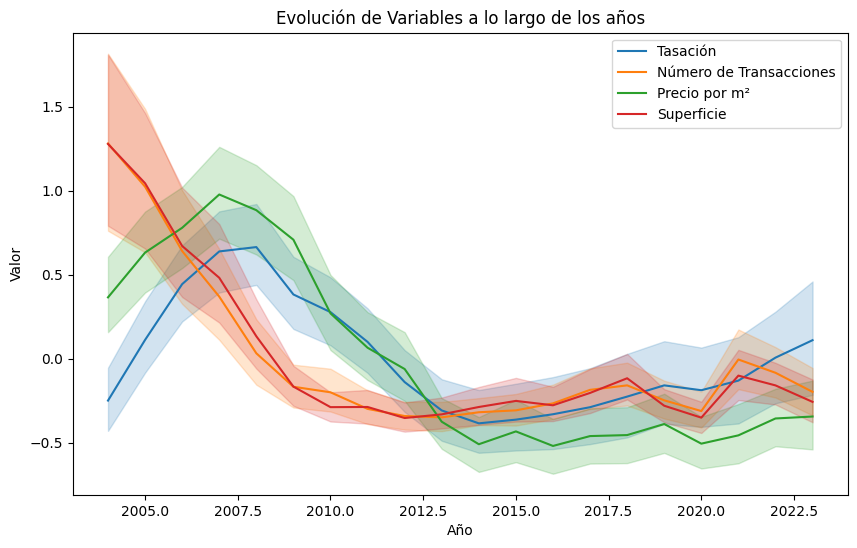

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Crear el gráfico para cada línea
sns.lineplot(data=df_escalado, x="Año", y="tasacion", label="Tasación")
sns.lineplot(data=df_escalado, x="Año", y="numero_tran", label="Número de Transacciones")
sns.lineplot(data=df_escalado, x="Año", y="precio_m2", label="Precio por m²")
sns.lineplot(data=df_escalado, x="Año", y="superficie", label="Superficie")

# Agregar título y etiquetas de los ejes
plt.title("Evolución de Variables a lo largo de los años")
plt.xlabel("Año")
plt.ylabel("Valor")

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

<Axes: >

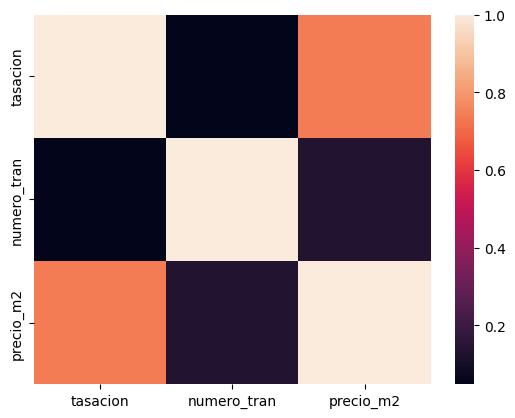

In [ ]:
matrix_cor = df_escalado.iloc[:,3:7].corr()
sns.heatmap(matrix_cor)

In [ ]:
from scipy.stats import pearsonr
corr, pval = pearsonr(df_escalado["precio_m2"], df_escalado["tasacion"])
print(corr, pval)

0.7368895482003631 1.4576321753024236e-227


<Axes: xlabel='precio_m2', ylabel='tasacion'>

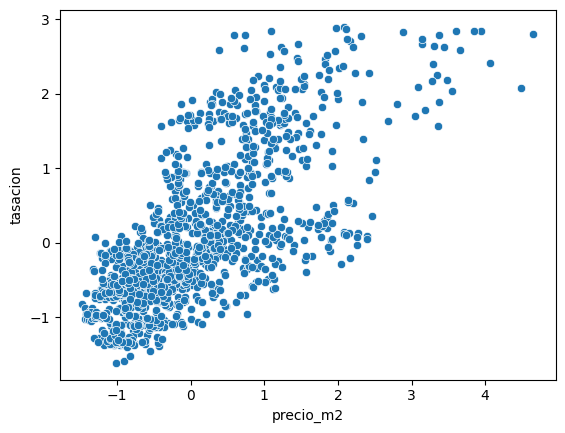

In [ ]:
sns.scatterplot(x='precio_m2', y='tasacion', data=df_escalado)

## Modelos de prediccion

### Calculo de la pendiente de la tendencia y la media de los valores para cada región.

In [ ]:

def calculo_prevision(df, año_corte):
    pendientes_por_region = {}

    for region, data_region in df[df["Año"] > año_corte].groupby("Region"):
        pendiente, _ = np.polyfit(data_region["Año"], data_region["tasacion"], 1)
        media_2023 = data_region[data_region["Año"] == 2023]["tasacion"].mean()

        # Calculo de la media esperada para el año 2024
        media_esperada_2024 = media_2023 + pendiente

        # Calculo de la media esperada para el año 2025
        media_esperada_2025 = media_esperada_2024 + pendiente

        pendientes_por_region[region] = {"Pendiente": pendiente, "Media_2023": media_2023, "Media_esperada_2024": media_esperada_2024, "Media_esperada_2025": media_esperada_2025}

    pendientes_df = pd.DataFrame.from_dict(pendientes_por_region, orient="index")
    pendientes_df = pendientes_df.sort_values(by="Pendiente", ascending=False)

    return pendientes_df
# Calculo de las tendencias de la tasacion para los proximos años
calculo_prevision(tasacion_media, 2014)

,Pendiente,Media_2023,Media_esperada_2024,Media_esperada_2025
Madrid (Comunidad de),112.673750,3011.250,3123.923750,3236.597500
Balears (Illes),106.252917,2887.575,2993.827917,3100.080833
Cataluña,60.330417,2197.375,2257.705417,2318.035833
Canarias,43.818333,1710.950,1754.768333,1798.586667
Melilla,43.693750,1836.525,1880.218750,1923.912500
Navarra (Comunidad Foral de),40.070000,1579.000,1619.070000,1659.140000
Andalucía,32.281667,1493.075,1525.356667,1557.638333
Comunidad Valenciana,28.876250,1391.825,1420.701250,1449.577500
País Vasco,18.075000,2545.975,2564.050000,2582.125000
Ceuta,15.193333,1843.350,1858.543333,1873.736667


### Predicción con modelo RandomForest

Región: Andalucía -->  MAE: 67.19, RMSE: 84.57, R²: 0.78, MAE en relación con la media: 4.71%, RMSE en relación con la media: 5.93%
Región: Aragón -->  MAE: 60.65, RMSE: 85.87, R²: 0.88, MAE en relación con la media: 4.14%, RMSE en relación con la media: 5.86%
Región: Asturias (Principado de ) -->  MAE: 44.20, RMSE: 68.58, R²: 0.82, MAE en relación con la media: 3.02%, RMSE en relación con la media: 4.69%
Región: Balears (Illes) -->  MAE: 55.01, RMSE: 72.67, R²: 0.91, MAE en relación con la media: 2.62%, RMSE en relación con la media: 3.47%
Región: Canarias -->  MAE: 52.49, RMSE: 81.10, R²: 0.70, MAE en relación con la media: 3.48%, RMSE en relación con la media: 5.37%
Región: Cantabria -->  MAE: 75.69, RMSE: 94.11, R²: 0.77, MAE en relación con la media: 4.49%, RMSE en relación con la media: 5.58%
Región: Castilla y León -->  MAE: 31.71, RMSE: 57.16, R²: 0.88, MAE en relación con la media: 2.59%, RMSE en relación con la media: 4.67%
Región: Castilla-La Mancha -->  MAE: 29.74, RMSE: 41

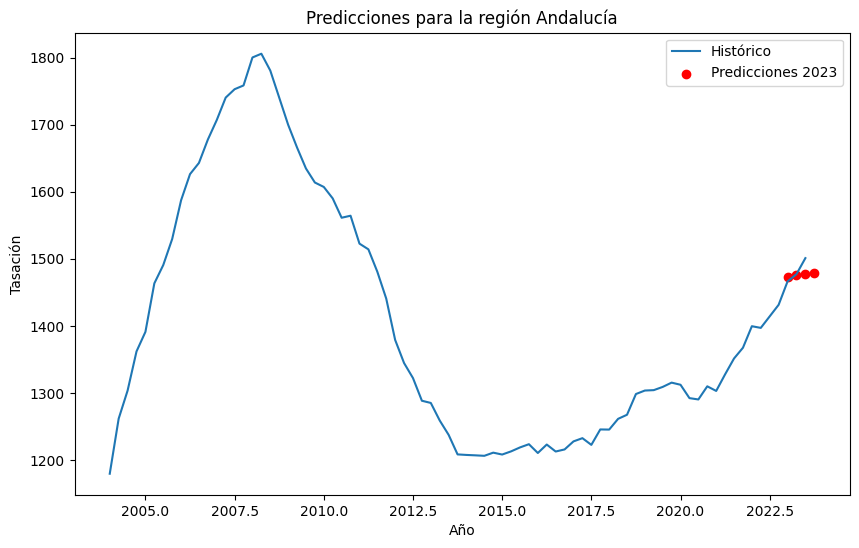

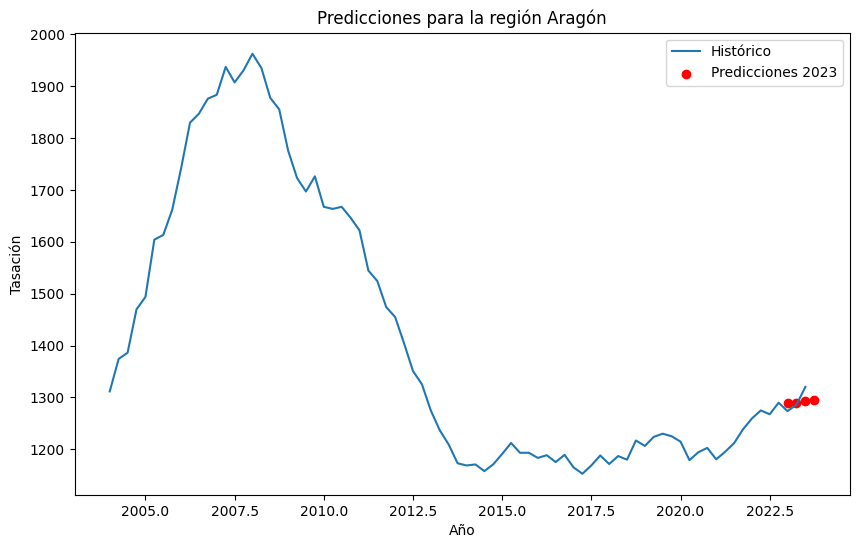

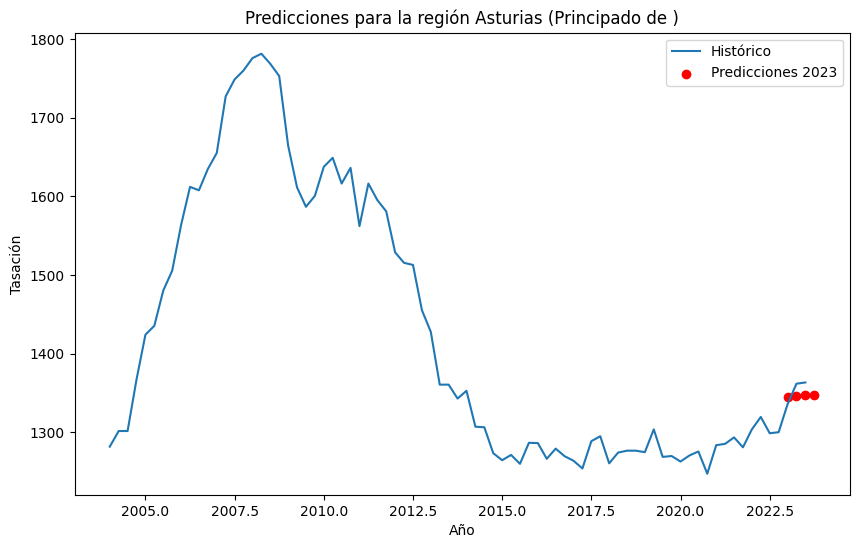

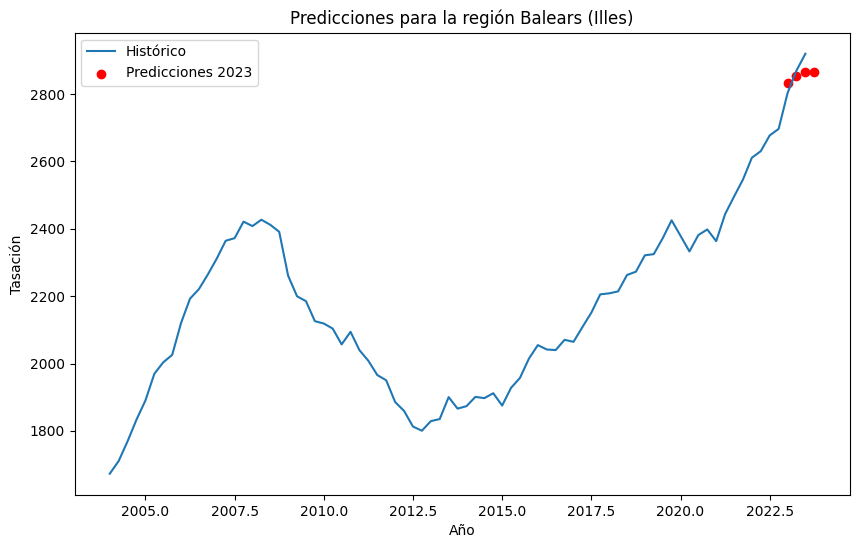

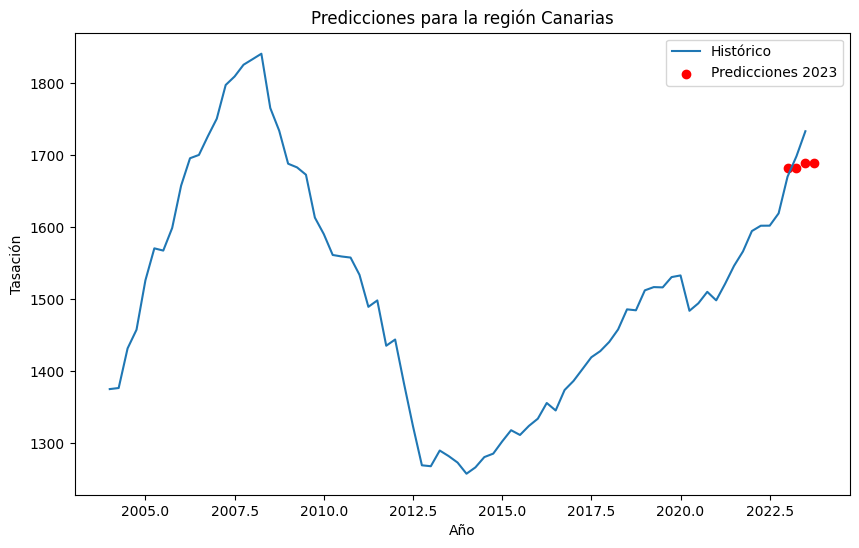

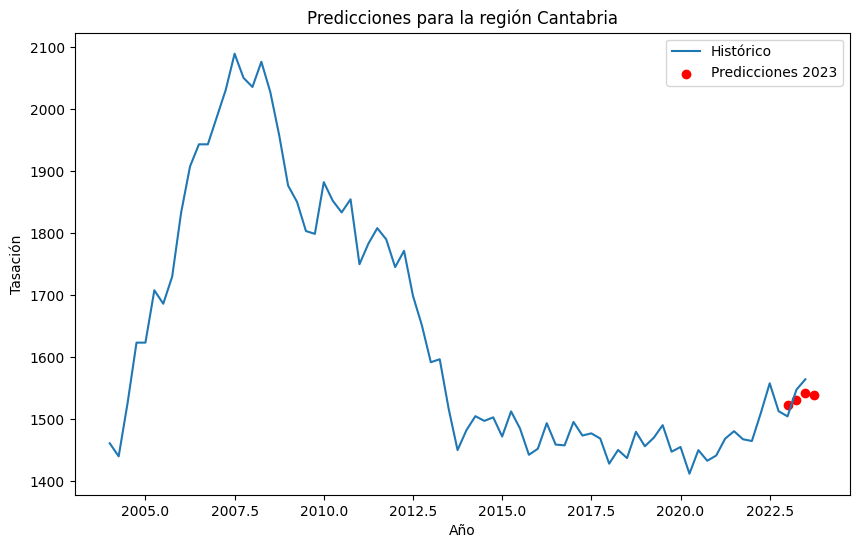

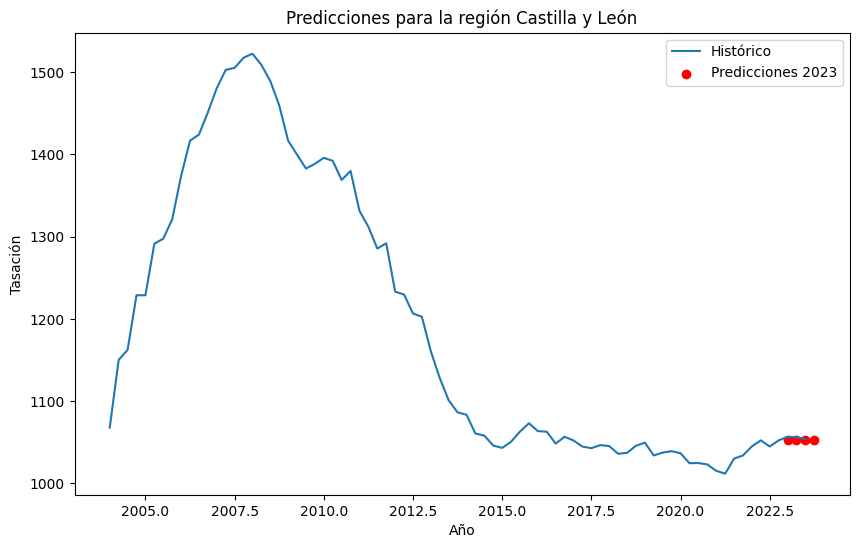

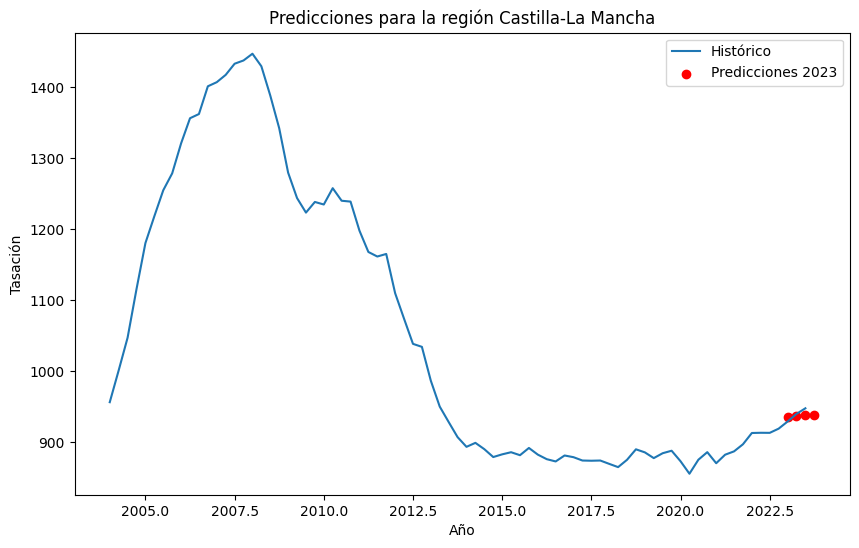

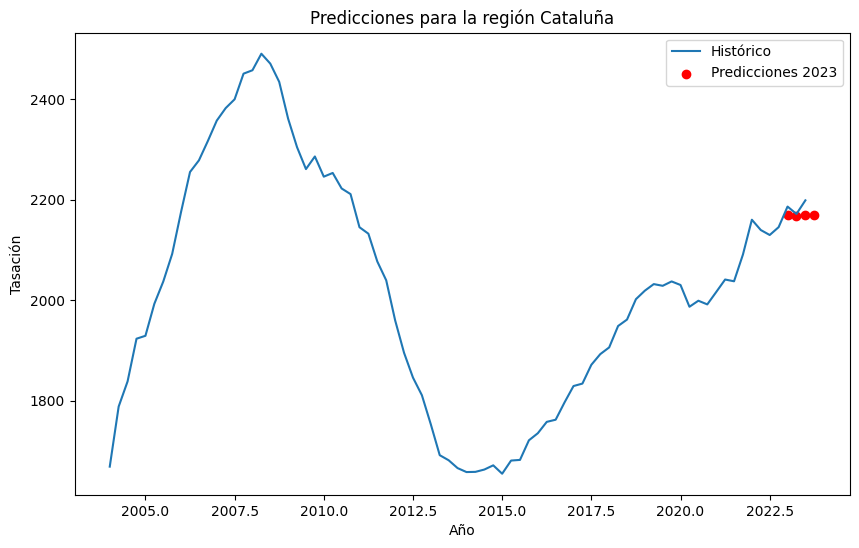

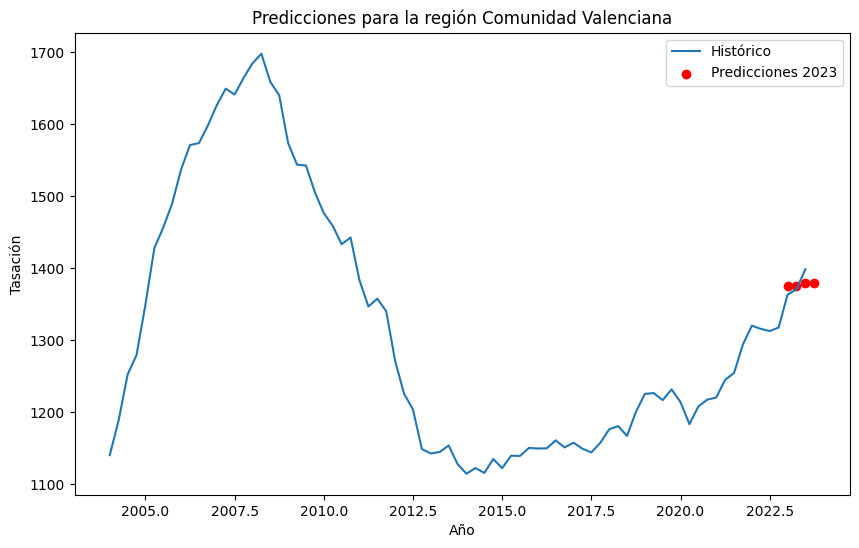

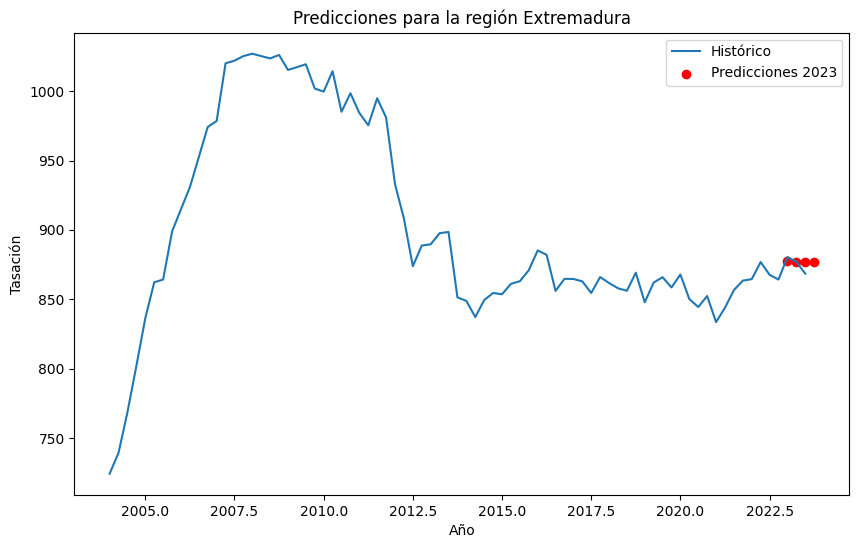

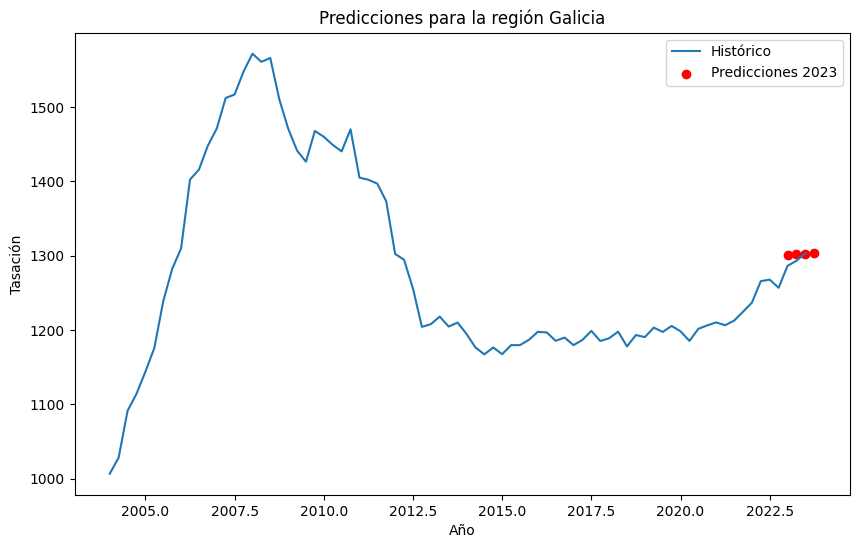

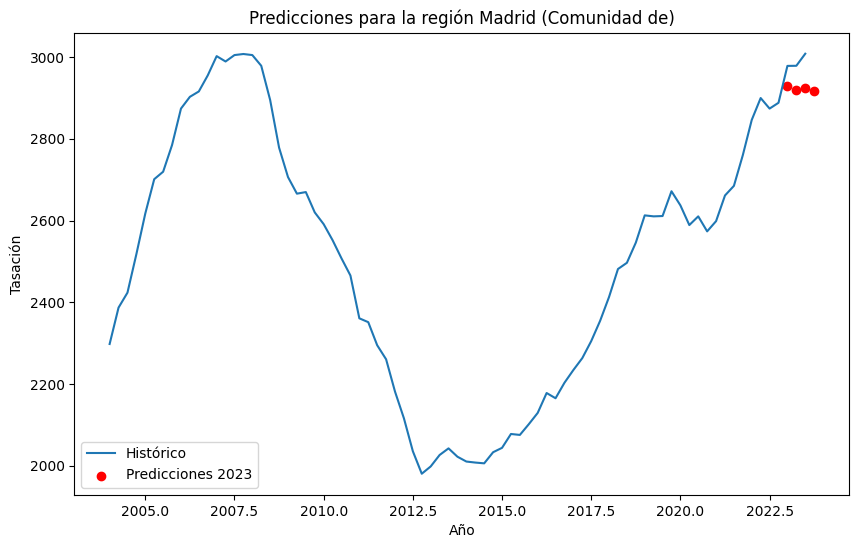

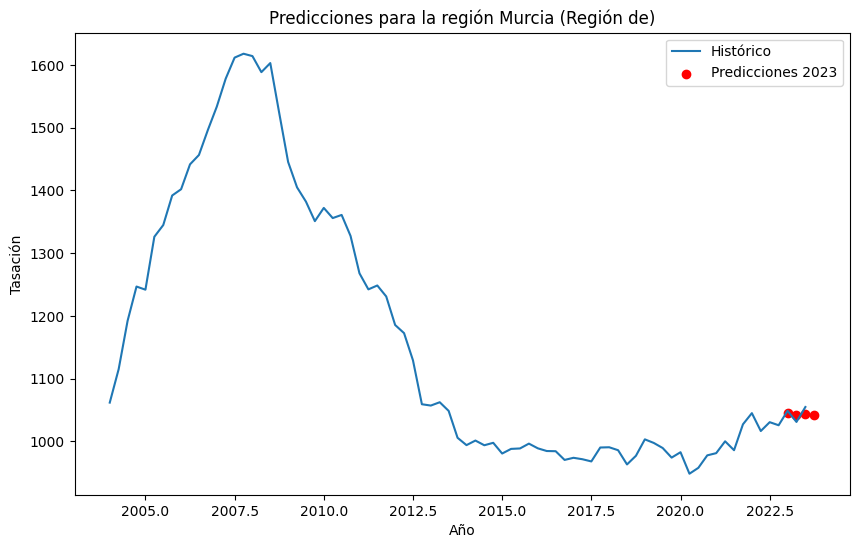

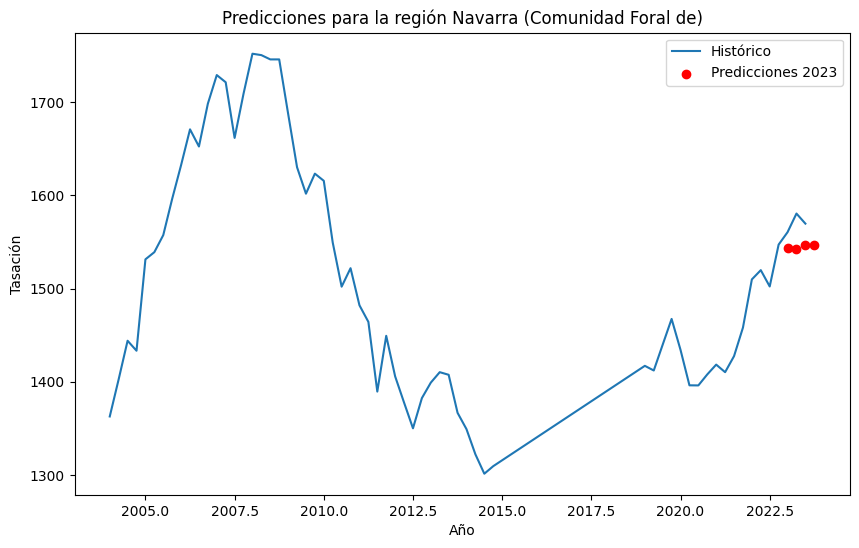

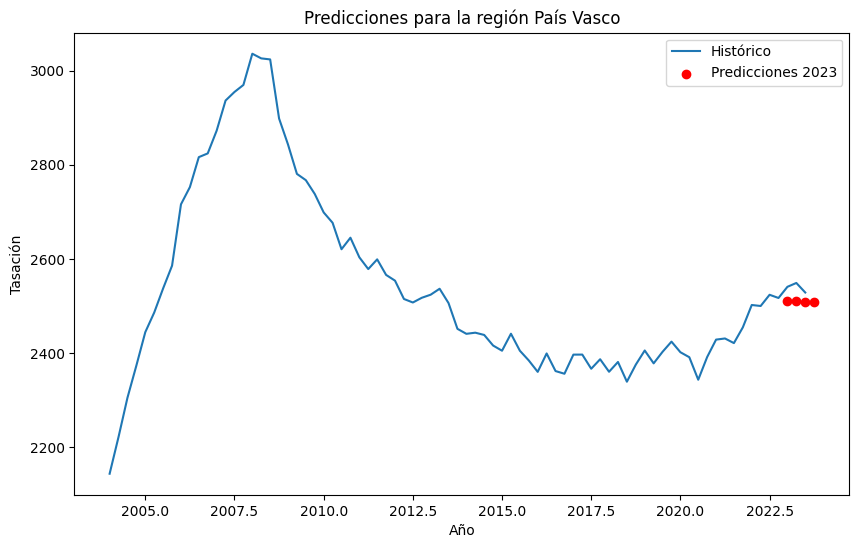

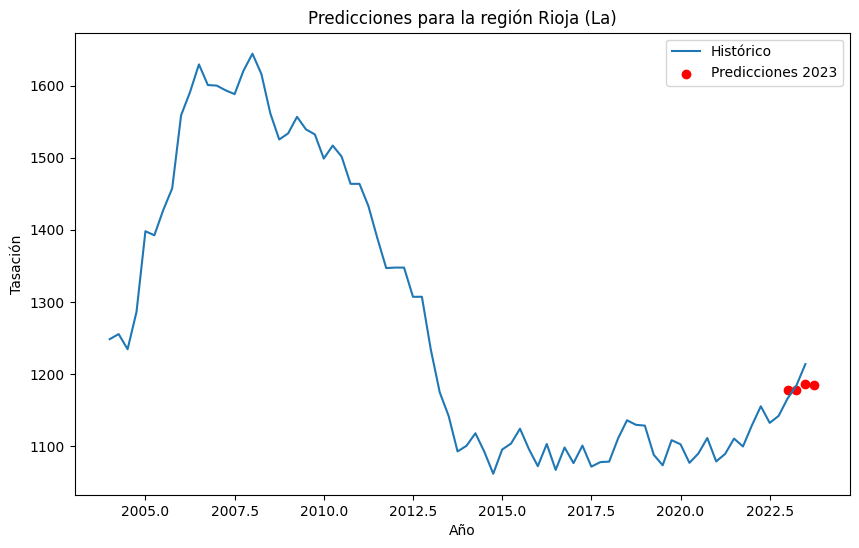

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df_final["Trimestre"] = df_final["Trimestre"].apply(lambda x: int(x[0]))
predicciones_por_region = {}

# Definir las variables predictoras
variables_predictoras = ["Año", "Trimestre", "numero_tran", "precio_m2", "superficie"]

# Iterar sobre cada región
for region, datos_region in df_final.groupby("Region"):
    if all(var in datos_region.columns for var in variables_predictoras):
        # Crear las variables predictoras (X) y la variable objetivo (y)
        X = datos_region[variables_predictoras].values
        y = datos_region["tasacion"].values

        X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

        modelo_regresion = RandomForestRegressor(n_estimators=100, random_state=42)
        modelo_regresion.fit(X_entrenamiento, y_entrenamiento)

        y_pred = modelo_regresion.predict(X_prueba)
        error_cuadratico_medio = mean_squared_error(y_prueba, y_pred)
        mae = mean_absolute_error(y_prueba, y_pred)
        rmse = np.sqrt(error_cuadratico_medio)
        r2 = r2_score(y_prueba, y_pred)

        mean_tasacion = np.mean(y_prueba)
        mae_relacion_media = (mae / mean_tasacion) * 100
        rmse_relacion_media = (rmse / mean_tasacion) * 100

        print(f"Región: {region} -->  MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAE en relación con la media: {mae_relacion_media:.2f}%, RMSE en relación con la media: {rmse_relacion_media:.2f}%")


        valores_recientes = datos_region[variables_predictoras[2:]].iloc[-1].values.reshape(1, -1)  # Tomar las últimas variables predictoras (sin Año y Trimestre)
        predicciones_2023 = []
        for trimestre in range(1, 5):
            X_prediccion = np.hstack((np.array([[2023, trimestre]]), valores_recientes))
            prediccion_trimestre = modelo_regresion.predict(X_prediccion)
            predicciones_2023.append(prediccion_trimestre[0])

        predicciones_por_region[region] = predicciones_2023

for region, datos_region in df_final.groupby("Region"):
    plt.figure(figsize=(10, 6))
    plt.plot(datos_region["Año"] + (datos_region["Trimestre"] - 1)/4, datos_region["tasacion"], label="Histórico")
    trimestres_2023 = [2023 + (t - 1)/4 for t in range(1, 5)]
    plt.scatter(trimestres_2023, predicciones_por_region[region], color='red', label="Predicciones 2023")
    plt.title(f"Predicciones para la región {region}")
    plt.xlabel("Año")
    plt.ylabel("Tasación")
    plt.legend()
    plt.show()

### Previsión con Red Neuronal

En primer lugar categorizamos las regiones segun los valores medios de tasacion, para posteriormente generar el metodo que nos construye el modelo.

In [ ]:
import pandas as pd

df_final = pd.read_excel("final.xlsx")
df_final = df_final.drop(df_final.columns[0], axis=1)   # Hacemos esto porque el INDICE esta duplicado

sustituido = {
    'Madrid (Comunidad de)': 1,
    'Balears (Illes)': 2,
    'País Vasco': 3,
    'Cataluña': 4,
    'Ceuta': 5,
    'Melilla': 6,
    'Canarias': 7,
    'Navarra (Comunidad Foral de)': 8,
    'Cantabria': 9,
    'Andalucía': 10,
    'Comunidad Valenciana': 11,
    'Asturias (Principado de)': 12,
    'Asturias (Principado de )': 12,
    'Aragón': 13,
    'Galicia': 14,
    'Rioja (La)': 15,
    'Castilla y León': 16,
    'Murcia (Región de)': 17,
    'Castilla-La Mancha': 18,
    'Extremadura': 19
}

df_final["Region"] = df_final["Region"].replace(sustituido, regex=False)
df_final["Trimestre"] = df_final["Trimestre"].str.replace("º", "").astype(int)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input
import matplotlib.pyplot as plt

def red_neuronal(df, window_size):
    # Variables a utilizar
    features = ['tasacion', 'numero_tran', 'precio_m2', 'superficie']
    target = 'tasacion'

    # Normalización de los datos
    scaler = MinMaxScaler()
    df.loc[:, features] = scaler.fit_transform(df[features])

    # Función para crear ventanas deslizantes
    def create_dataset(df, features, target, window_size):
        X, y = [], []
        for i in range(len(df) - window_size):
            X.append(df[features].iloc[i:i + window_size].values)
            y.append(df[target].iloc[i + window_size])
        return np.array(X), np.array(y)

    # Creación del dataset
    X, y = create_dataset(df, features, target, window_size)

    # División de los datos en entrenamiento y prueba
    X_train, X_test = X[:-5], X[-5:]
    y_train, y_test = y[:-5], y[-5:]

    # Definición del modelo LSTM
    model = Sequential()
    model.add(Input(shape=(window_size, len(features))))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping], verbose=0)

    # Evaluación del modelo
    train_loss = model.evaluate(X_train, y_train)
    val_loss = model.evaluate(X_test, y_test)
    print(f'Training Loss: {train_loss}')
    print(f'Validation Loss: {val_loss}')

    # Predicciones
    y_pred = model.predict(X_test)

    # Desnormalización (si es necesario)
    temp_test = pd.DataFrame(np.c_[y_test, np.zeros((len(y_test), len(features)-1))], columns=features)
    temp_pred = pd.DataFrame(np.c_[y_pred, np.zeros((len(y_pred), len(features)-1))], columns=features)

    y_test_descaled = scaler.inverse_transform(temp_test)[:, 0]
    y_pred_descaled = scaler.inverse_transform(temp_pred)[:, 0]

    # Métricas de evaluación
    mse = mean_squared_error(y_test_descaled, y_pred_descaled)
    mae = mean_absolute_error(y_test_descaled, y_pred_descaled)
    r2 = r2_score(y_test_descaled, y_pred_descaled)
    rmse = np.sqrt(mse)

    # Calcular media y mediana de los datos reales
    mean_tasacion = np.mean(y_test_descaled)
    median_tasacion = np.median(y_test_descaled)

    print(f'Media de tasacion: {mean_tasacion}')
    print(f'Mediana de tasacion: {median_tasacion}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    print(f'MAE en relación con la media: {mae / mean_tasacion * 100:.2f}%')
    print(f'RMSE en relación con la media: {rmse / mean_tasacion * 100:.2f}%')

    # Gráfica de puntos: Valores reales vs Predicciones
    # Mostrar las predicciones junto con los datos históricos
    plt.figure(figsize=(14, 7))
    plt.scatter(range(len(df) - len(y_test), len(df)), y_test_descaled, color='black', label="Valores reales")
    plt.scatter(range(len(df) - len(y_test), len(df)), y_pred_descaled, color='red', label="Predicciones")
    plt.xlabel('Índice de Tiempo')
    plt.ylabel('Tasación')
    plt.title('Valores Reales vs Predicciones')
    plt.legend()
    plt.show()

    # Distribución de los Errores
    errors = y_test_descaled - y_pred_descaled
    plt.figure(figsize=(14, 7))
    plt.hist(errors, bins=20)
    plt.xlabel('Error')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de los Errores')
    plt.show()

    # Curvas de Aprendizaje
    plt.figure(figsize=(14, 7))
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Curvas de Aprendizaje')
    plt.legend()
    plt.show()

### Modelo Caros

In [ ]:
df_filtered = df_final[df_final["Region"].isin([1, 2, 3, 4])]
df_filtered.head()

,Region,Año,Trimestre,tasacion,numero_tran,precio_m2,superficie
3,2,2004,1,1672.8,677,243.39,728.3
8,4,2004,1,1668.7,6154,220.43,7397.7
12,1,2004,1,2298.1,1627,363.37,3241.4
15,3,2004,1,2143.9,311,324.24,665.6
20,2,2004,2,1710.6,729,314.49,1273.8


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1192e-04 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 9.1950e-04
Training Loss: 0.0006397878751158714
Validation Loss: 0.0009195045568048954
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
Media de tasacion: 2640.8799999999997
Mediana de tasacion: 2549.0
MAE: 39.66459514141079
RMSE: 41.88257819655695
R²: 0.979567365634694
MAE en relación con la media: 1.50%
RMSE en relación con la media: 1.59%


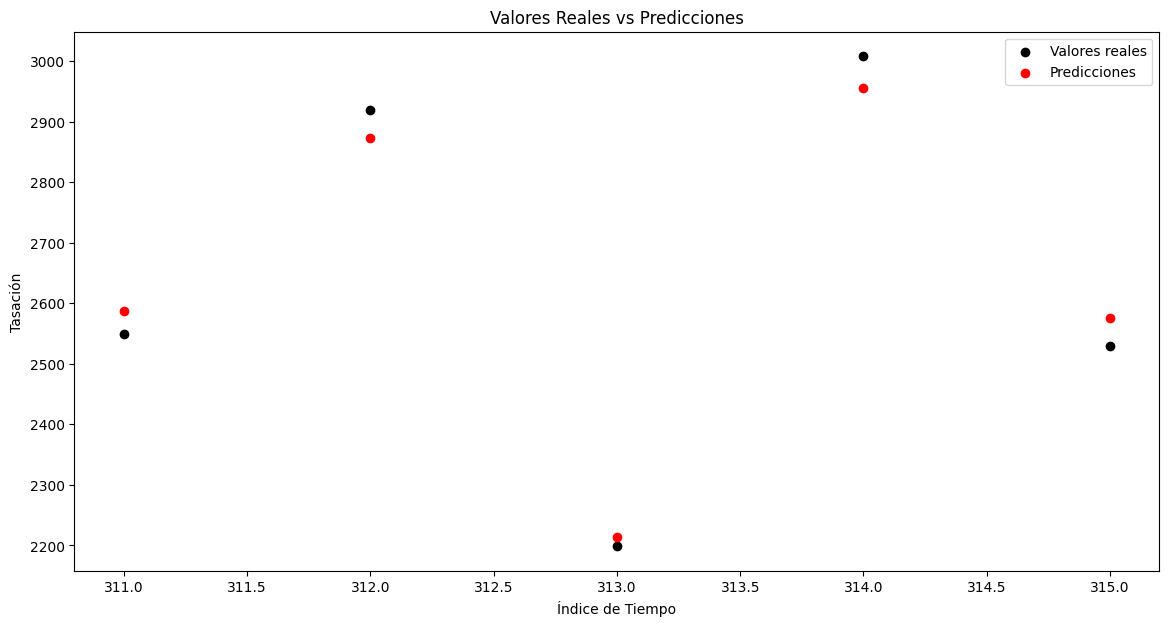

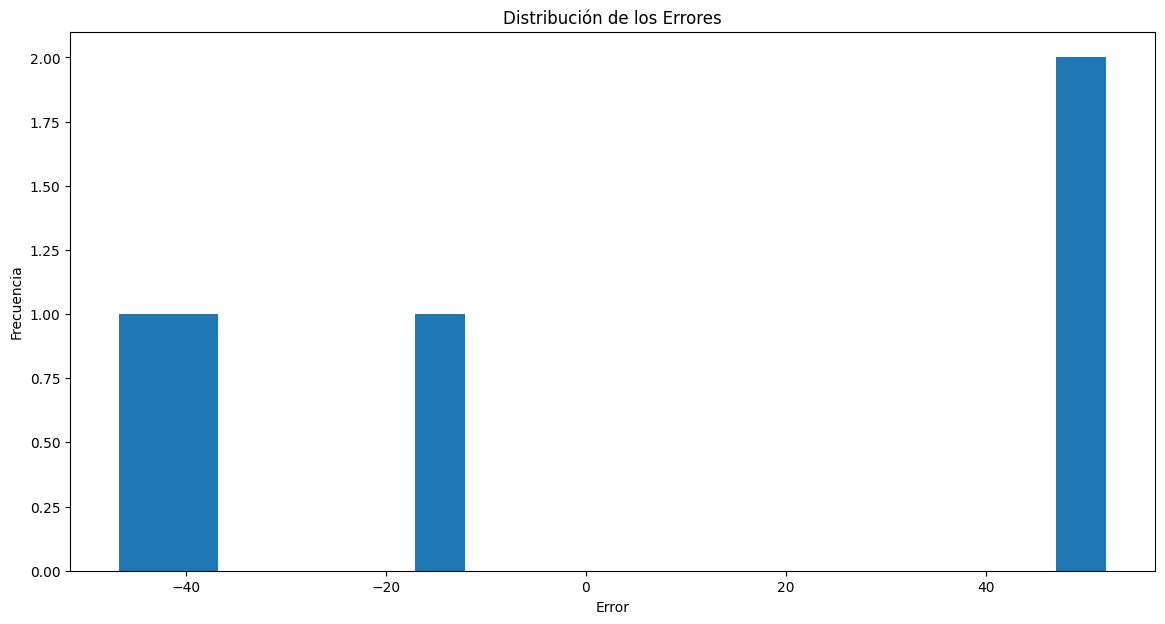

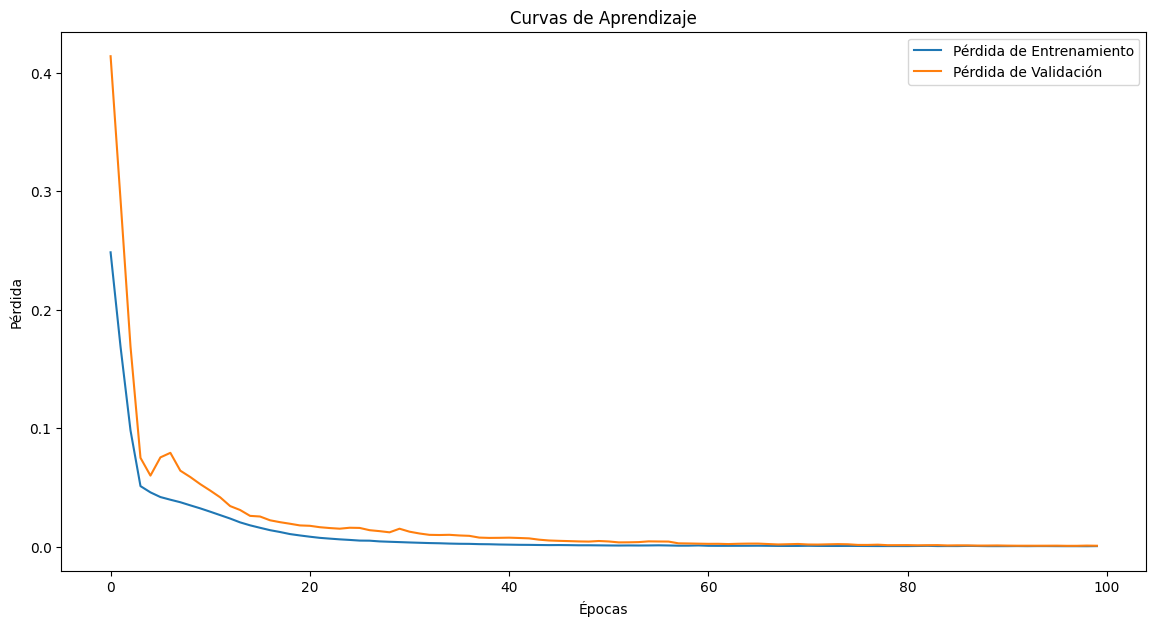

In [ ]:
red_neuronal(df_filtered, window_size=4)

### Modelos precios medios

In [ ]:
df_filtered = df_final[df_final["Region"].isin([i for i in range(5,14)])]
df_filtered.head()

,Region,Año,Trimestre,tasacion,numero_tran,precio_m2,superficie
0,10,2004,1,1179.7,3538,174.75,5128.1
1,13,2004,1,1311.6,432,195.63,525.9
2,12,2004,1,1281.7,143,277.16,178.2
4,7,2004,1,1375.4,650,260.88,1020.9
5,9,2004,1,1461.0,284,120.44,570.5


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0013
Training Loss: 0.0023274177219718695
Validation Loss: 0.001311040949076414
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Media de tasacion: 1525.9199999999998
Mediana de tasacion: 1564.2
MAE: 33.08181453824045
RMSE: 35.277747971823715
R²: 0.930064965792919
MAE en relación con la media: 2.17%
RMSE en relación con la media: 2.31%


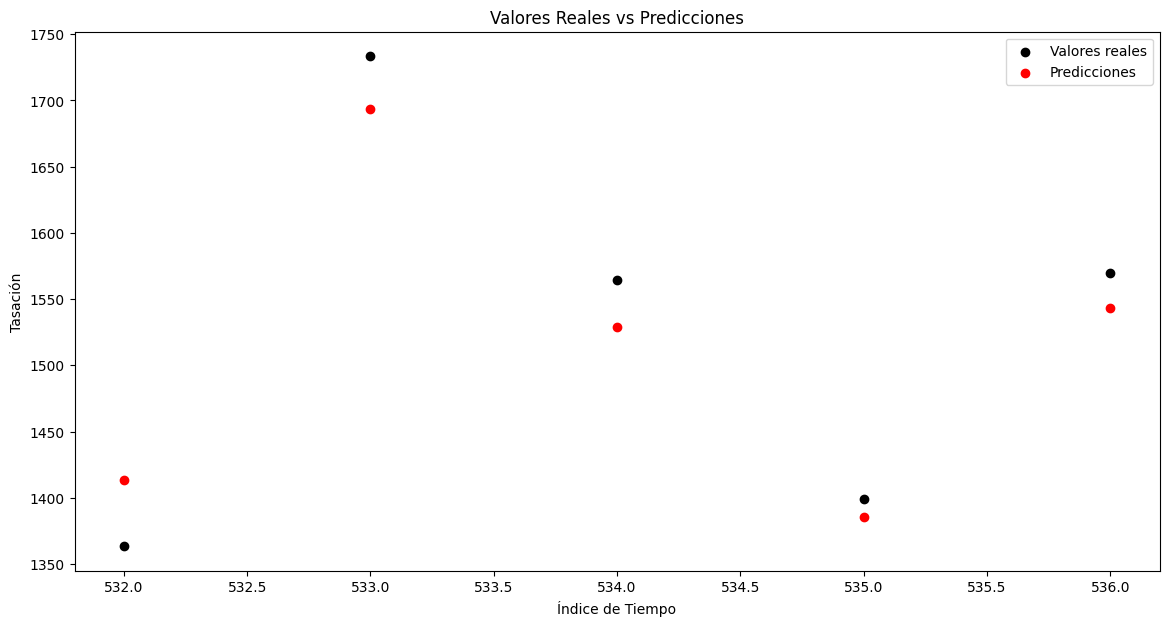

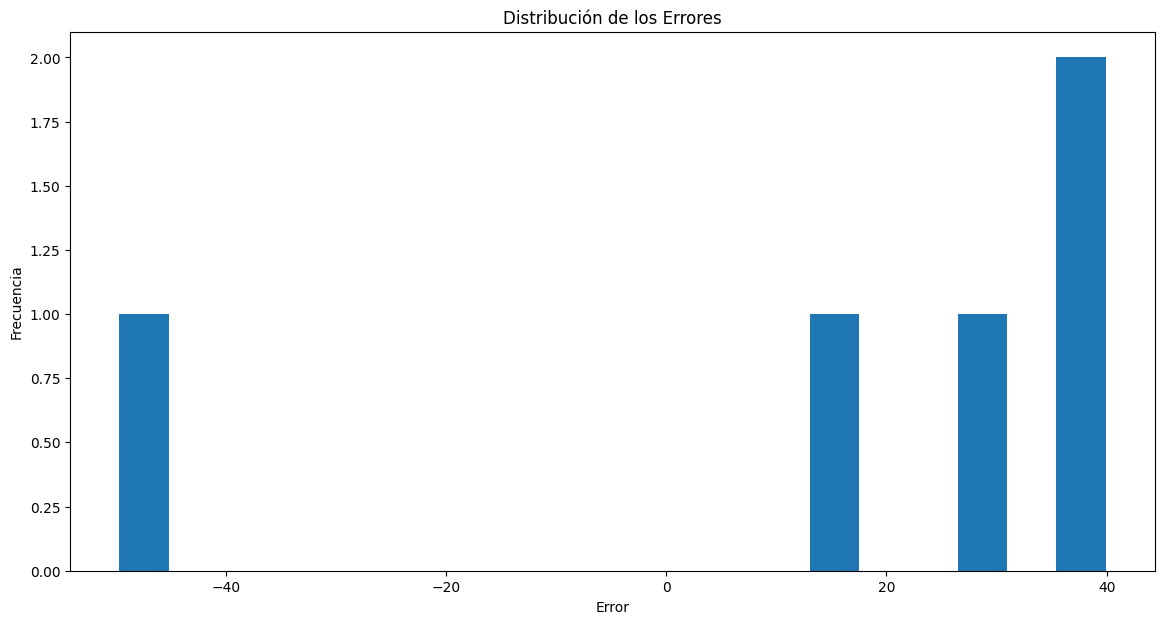

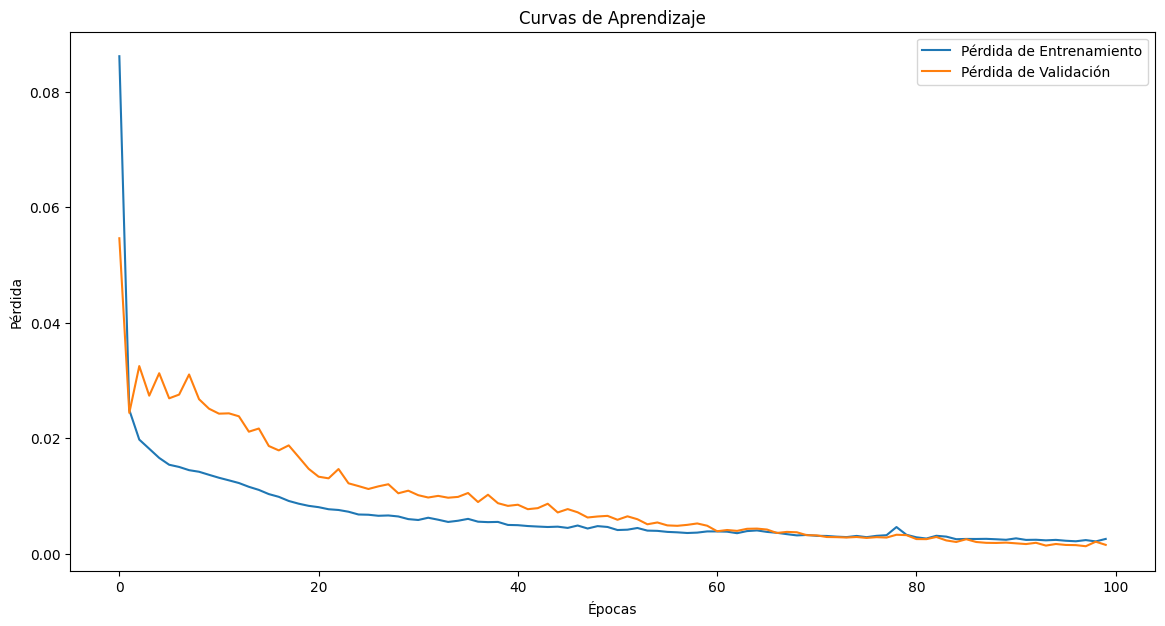

In [ ]:
red_neuronal(df_filtered, window_size=7)

### Modelos precios bajos

In [ ]:
df_filtered = df_final[df_final["Region"].isin([i for i in range(14,20)])]
df_filtered.head()

,Region,Año,Trimestre,tasacion,numero_tran,precio_m2,superficie
6,16,2004,1,1067.8,1464,103.25,1468.8
7,18,2004,1,956.4,2203,98.04,1758.8
10,19,2004,1,724.2,765,92.77,551.0
11,14,2004,1,1006.6,419,178.66,346.6
13,17,2004,1,1061.7,654,266.06,907.9


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.2608e-04
Training Loss: 0.0010224402649328113
Validation Loss: 0.0005260820034891367
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
Media de tasacion: 1077.64
Mediana de tasacion: 1054.7
MAE: 18.766722230911274
RMSE: 21.1015634934011
R²: 0.982954433742081
MAE en relación con la media: 1.74%
RMSE en relación con la media: 1.96%


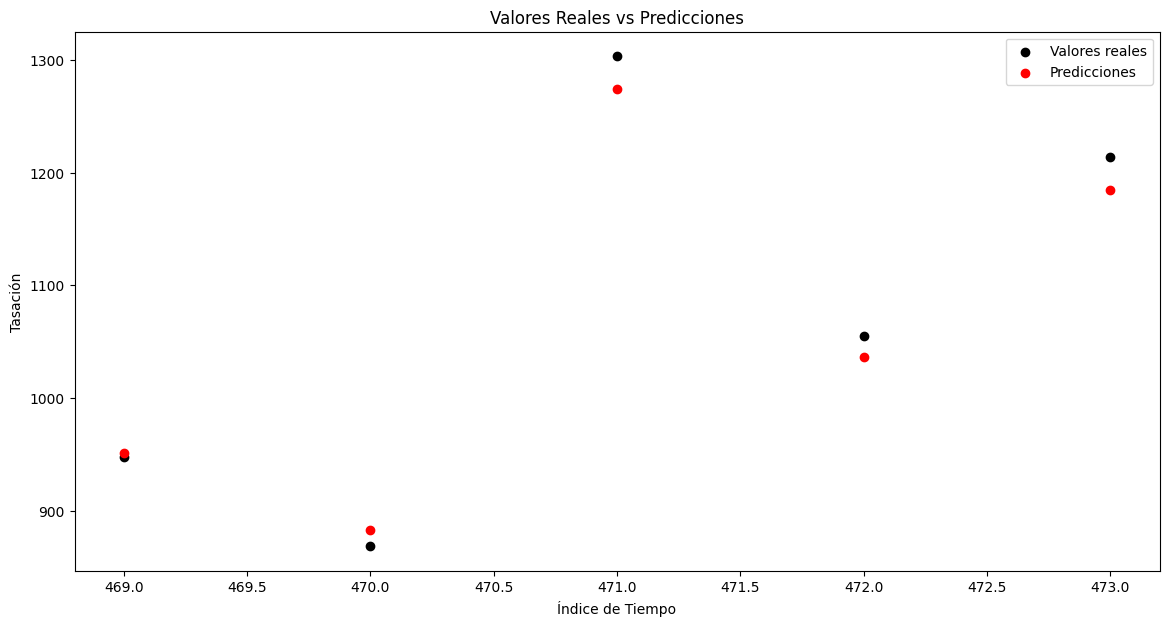

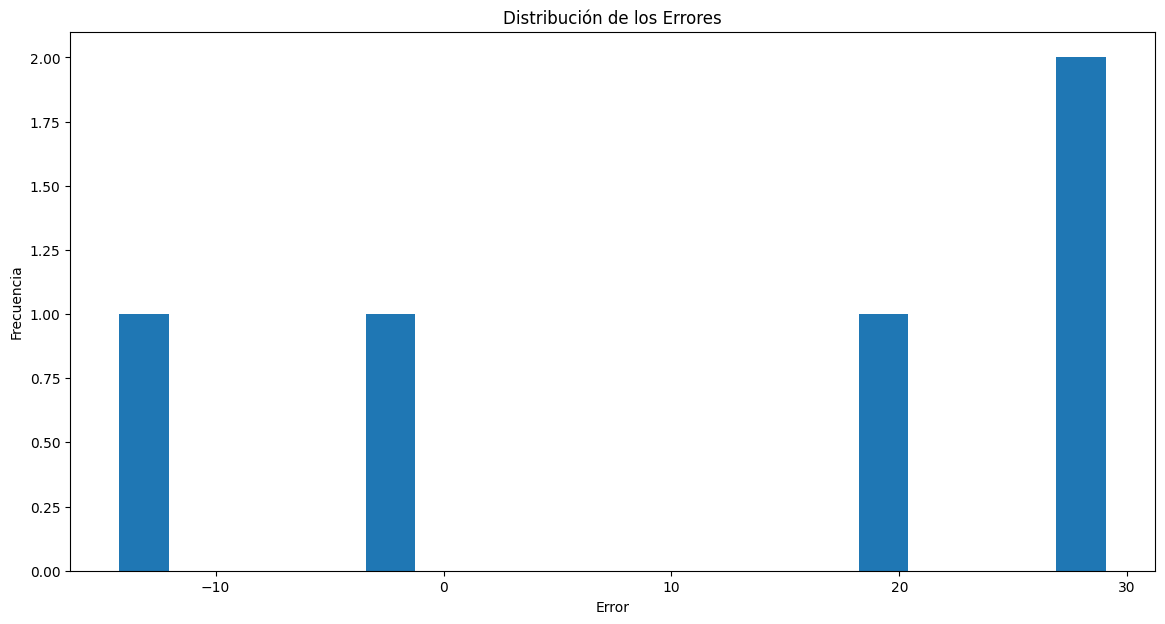

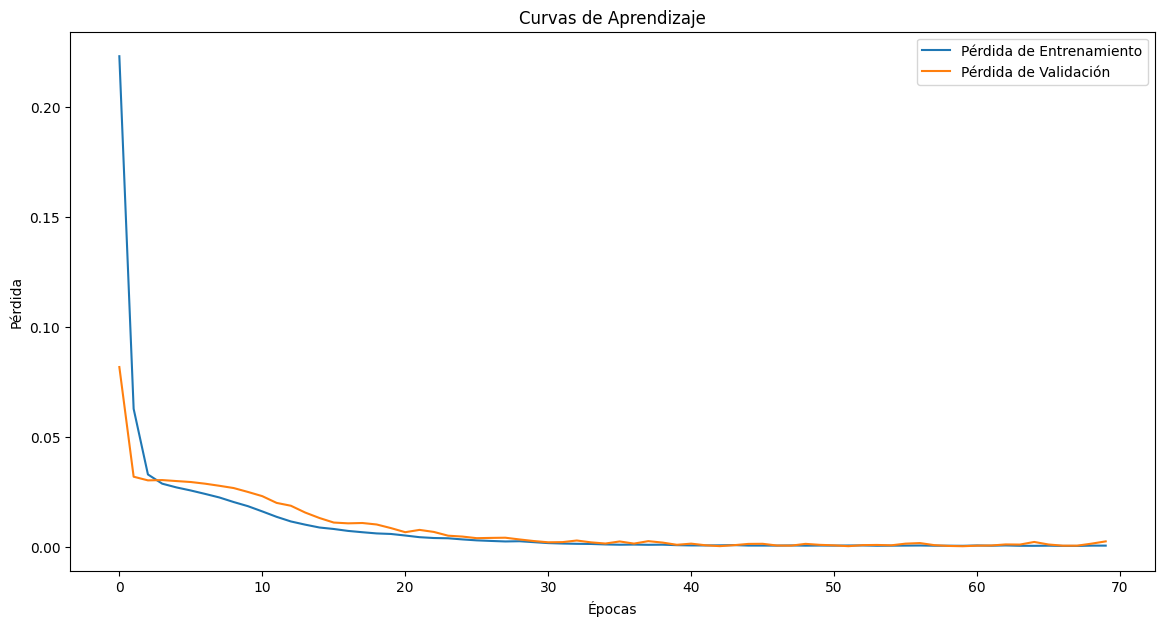

In [ ]:
red_neuronal(df_filtered, window_size=6)